In [12]:
# Import libriraies
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [13]:
# Import data and Create a dataframe for 2020 data
df_2020 = pd.read_csv("data/2020.csv")

In [14]:
#------------------------#
# STEP 1 - Overview
#------------------------#

In [15]:
# Have a look at the begining of the datafram (head)


In [16]:
# Have a look at the variables type & null values (info)


In [17]:
# Have a look at the variables stats (describe)


In [18]:
#------------------------#
# STEP 2 - Exploring each variable
#------------------------#

In [19]:
# Create a distribution plot for a numerical variable 


In [20]:
# Create a vertical bar chart for a categorical variable 


In [21]:
# [Bonus] Create a horizontal bar chart for a categorical variable 


In [22]:
## [Bonus] Multiple plots for all numerical variables
#get numerical values

# create plot

In [23]:
#------------------------#
# STEP 3 - Exploring variables relationships
#------------------------#

In [24]:
# 3-A / Staying in 2020 #
#------------------------#

In [25]:
# 1 Numerical x 1 Numerical : Chart for the relationship between 2 numerical variables


In [26]:
# [Bonus] Multiplot grid about relationship between numerical variables


In [27]:
# 1 Categorical x 1 Numerical : Chart for the relationship between numerical & categorical variable


In [28]:
# 1 Categorical x 2 Numerical : Chart for the relationship between 2 numerical & 1 categorical variable
# (happiness score, the gdp per capita and the region variables)


In [29]:
# How could you plot small multiples, e.g. one subplot for each region ?


In [30]:
# 3-B / Looking in the past #
#------------------------#

In [31]:
# Importing data from other files, adding a 'year' column
df_2019 = pd.read_csv("data/2019.csv")[['country', 'score']]
df_2019['year'] = 2019
df_2018 = pd.read_csv("data/2018.csv")[['country', 'score']]
df_2018['year'] = 2018
df_2017 = pd.read_csv("data/2017.csv")[['country', 'score']]
df_2017['year'] = 2017
df_2016 = pd.read_csv("data/2016.csv")[['country', 'score']]
df_2016['year'] = 2016
df_2015 = pd.read_csv("data/2015.csv")[['country', 'score']]
df_2015['year'] = 2015

df_2020['year'] = 2020
df_2020_score = df_2020[['country', 'score', 'year']]

In [32]:
# Merging all files together. 
# In the seaborn world, this shape is called Long- form : https://seaborn.pydata.org/tutorial/data_structure.html
df_merge = pd.concat([df_2020_score, df_2019, df_2018, df_2017, df_2016, df_2015])
df_merge.head()

,country,score,year
0,Finland,7.8087,2020
1,Denmark,7.6456,2020
2,Switzerland,7.5599,2020
3,Iceland,7.5045,2020
4,Norway,7.4880,2020


In [34]:
# Evolution of happiness for one country

# Filter the dataframe on one country (select specific rows)

# Plot a chart


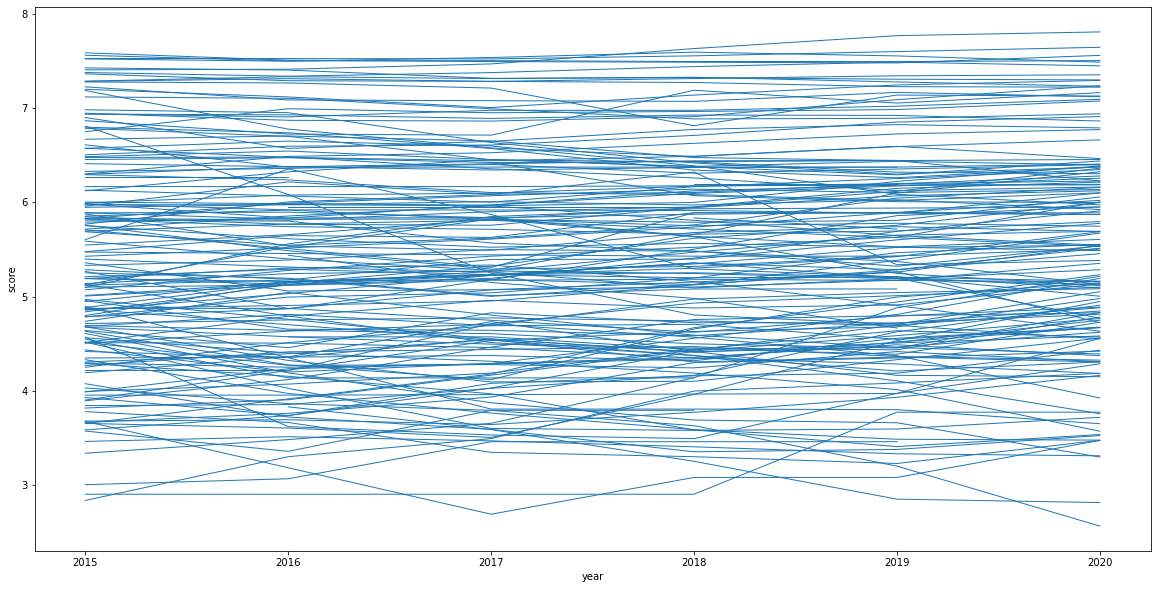

In [35]:
# Let’s plot the evolution for all countries. Is that lisible ?
plt.figure(figsize=(20,10))
sns.lineplot(
    data=df_merge,
    x="year", y="score", units="country",
    estimator=None, lw=1,
)

In [36]:
# 3-B-1 Separating countries that have a positive / negative trend
#------------------------#
# Now I want to distinguish countries where the trend is positive (2020 score > 2015 score) versus negative
# For this, I need to compute the trend value by country. We will use the pandas'pivot functions
# to easily compute a new variable for each country
# In the seaborn world, this shape is called Wide-form : https://seaborn.pydata.org/tutorial/data_structure.html
pivot = df_merge.pivot(index ='country', columns='year', values='score')
pivot.head()

year,2015,2016,2017,2018,2019,2020
country,,,,,,
Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669
Albania,4.959,4.655,4.644,4.586,4.719,4.8827
Algeria,5.605,6.355,5.872,5.295,5.211,5.0051
Angola,4.033,3.866,3.795,3.795,NaN,NaN
Argentina,6.574,6.650,6.599,6.388,6.086,5.9747


In [37]:
# computing the trend value for each country
df_pivot = pd.DataFrame(pivot.to_records())
df_pivot['trend'] = (df_pivot['2020'] - df_pivot['2015']) > 0
df_pivot.head()

,country,2015,2016,2017,2018,2019,2020,trend
0,Afghanistan,3.575,3.360,3.794,3.632,3.203,2.5669,False
1,Albania,4.959,4.655,4.644,4.586,4.719,4.8827,False
2,Algeria,5.605,6.355,5.872,5.295,5.211,5.0051,False
3,Angola,4.033,3.866,3.795,3.795,NaN,NaN,False
4,Argentina,6.574,6.650,6.599,6.388,6.086,5.9747,False


In [38]:
# now we want to go back to the Long-form format, it's often easier to plot in seaborn
df_melted = pd.melt(df_pivot, id_vars=['country', 'trend'], value_vars=['2015', '2016', '2017', '2018', '2019', '2020'], var_name='year', value_name='score')
df_melted.head()

,country,trend,year,score
0,Afghanistan,False,2015,3.575
1,Albania,False,2015,4.959
2,Algeria,False,2015,5.605
3,Angola,False,2015,4.033
4,Argentina,False,2015,6.574


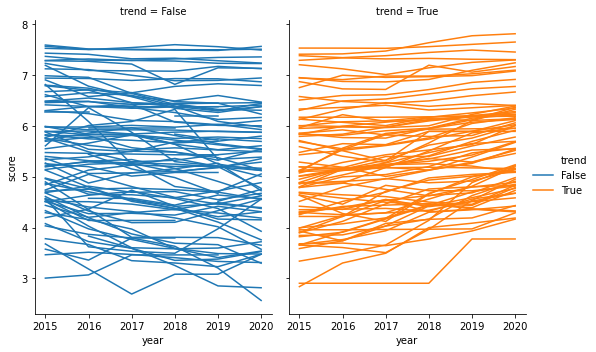

In [40]:
# plotting the same chart with two tweaks : we are separating the line both physically and by color coding
# according to the value of the variable Trend
sns.relplot(
    data=df_melted,
    x="year", y="score",
    hue="trend", col="trend",
    units='country', estimator=None,
    kind="line",
    height=5, aspect=.75, facet_kws=dict(sharex=False),
)

In [41]:
# 3-B-2 Looking at more specific groups of countries : the most and the least happy
#------------------------#
# Let's arbitrarily define "happy countries" by the fact of having a score higher than 7 in 2020
df_high_happiness = df_merge[(df_merge['year'] == 2020) & (df_merge['score'] > 7)]
df_high_happiness.head()

,country,score,year
0,Finland,7.8087,2020
1,Denmark,7.6456,2020
2,Switzerland,7.5599,2020
3,Iceland,7.5045,2020
4,Norway,7.4880,2020


In [42]:
# we extract those countries's name
happy_countries = pd.Series(df_high_happiness['country'].unique())
happy_countries

0            Finland
1            Denmark
2        Switzerland
3            Iceland
4             Norway
5        Netherlands
6             Sweden
7        New Zealand
8            Austria
9         Luxembourg
10            Canada
11         Australia
12    United Kingdom
13            Israel
14        Costa Rica
15           Ireland
16           Germany
dtype: object

In [43]:
# back to our data, we are creating a new dataframe filtering th original one with those selected countries's name
df_happy_countries = df_merge.loc[df_merge['country'].isin(happy_countries.values)]

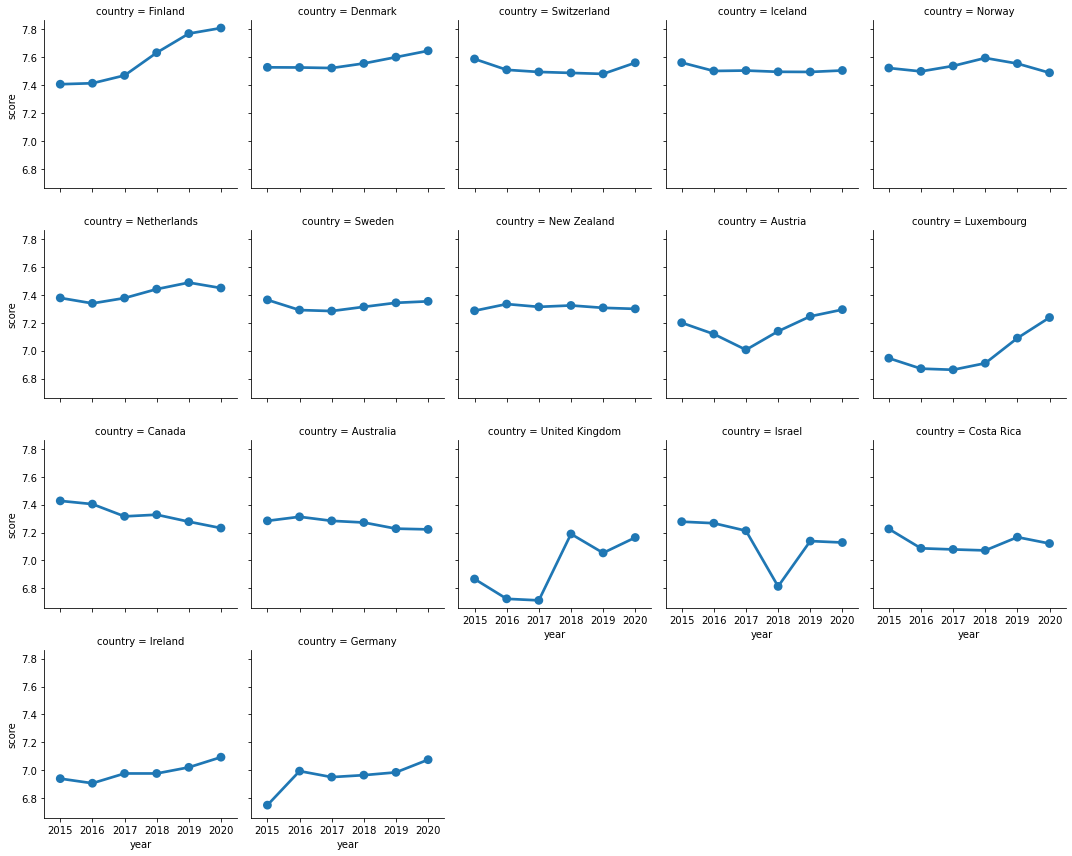

In [44]:
# in order to see the evolution clearly for each country, we are using a small multiple plot
# note how the x and y axis have the same scale so that it is easier to compare visualy all the countries
# we are using a linked point plot here to keep in mind that it's an evolution, but we don't have really linear data
g = sns.FacetGrid(df_happy_countries, col="country", col_wrap=5, height=3)
g.map(sns.pointplot, "year", "score", order=[2015, 2016, 2017, 2018, 2019, 2020])